# ML lec 02 - Linear Regression의 Hypothesis와 Cost

## Predicting exam score: regression

## Regression(data)
x = [1,2,3]
y = [1,2,3]

In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


## (Linear) Hypothesis(가설, 추정)
$$H(x) = Wx + b$$

(0.0, 3.0)

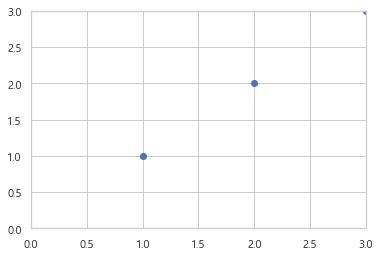

In [6]:
x = [1,2,3]
y = [1,2,3]

plt.scatter(x, y, marker='o')
plt.xlim(0, 3)
plt.ylim(0, 3)

## Which hypothesis is bettr

## Cost function (Loss function)
- How fit the line to our (training) data
$$H(x) - y$$
$$(H(x) -y)^2$$

$$\frac{(H(x^{(1)} -y^{(1)})^2 + (H(x^{(2)}) -y^{(2)})^2 + (H(x^{(3)} -y^{(3)})^2}{3}$$
$$cost = \frac{1}{m}\sum_{i=1}^m (H(x^{(i)}) - y^{(i)})^2$$
$$H(x) = Wx$$

$$cost(W, b) = \frac{1}{m}\sum_{i=1}^m (Wx^{(i)} + b - y^{(i)})^2$$

## Goal: Minimize cost
$$minimize\; cost(W, b)$$